<a href="https://colab.research.google.com/github/donghyundavidchoi/Data_Analysis/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%95%EC%A0%9C/%EC%B5%9C%EB%B9%88%EA%B0%92_mode_%EC%97%AC_%EC%A1%B4%EC%8A%A8_%EB%B0%95%EC%8A%A4_%EC%BD%95%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터에서 20세 이상인 데이터를 추출하고 'f1'컬럼을 결측치를 최빈값으로 채운 후, f1 컬럼의 여-존슨과 박스-콕스 변환 값을 구하고, 두 값의 차이를 절대값으로 구한다음 모두 더해 소수점 둘째 자리까지 출력(반올림)하시오

--------------

**sklearn.preprocessing.PowerTransformer(method='yeo-johnson', *, standardize=True, copy=True)**  
power_transformer를 통해 데이터를 정규분포 / 가우시안분포에 '가깝게' 변환   
박스-콕스의 경우 변환하려는 데이터가 양수로만 이루어져 있어야함   
여-존슨의 경우 음수나 0을 포함한 데이터도 변환 가능

**박스-콕스**

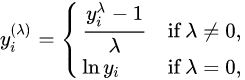

**여-존슨**

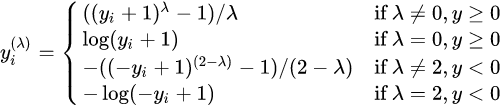

---------

In [68]:
!gdown --fuzzy https://drive.google.com/file/d/1txRVXp-Eh222PzIeTQ-fuAoUYFR9f7q-/view?usp=sharing
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Downloading...
From: https://drive.google.com/uc?id=1txRVXp-Eh222PzIeTQ-fuAoUYFR9f7q-
To: /content/kaggle.json
100% 73.0/73.0 [00:00<00:00, 100kB/s]


In [69]:
!kaggle datasets download -d agileteam/bigdatacertificationkr

bigdatacertificationkr.zip: Skipping, found more recently modified local copy (use --force to force download)


In [70]:
!unzip /content/bigdatacertificationkr.zip

Archive:  /content/bigdatacertificationkr.zip
replace basic1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: basic1.csv              
  inflating: basic1_json.json        
  inflating: basic1_xml.xml          
  inflating: basic2.csv              
  inflating: basic3.csv              


In [71]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import power_transform

In [72]:
data = pd.read_csv('/content/basic1.csv')

In [73]:
data

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869
...,...,...,...,...,...,...,...,...
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078
96,id97,100.0,경기,NaN,0,NaN,INFP,67.886373
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034


--------

# age가 20 이상인 데이터 추출

In [74]:
data = data[data['age'] >= 20]

In [75]:
data

,id,age,city,f1,f2,f3,f4,f5
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869
5,id06,22.0,서울,57.0,0,vip,INTP,20.129444
6,id07,36.3,서울,60.0,1,NaN,ISFJ,9.796378
...,...,...,...,...,...,...,...,...
94,id95,77.0,경기,43.0,1,NaN,INTJ,91.297791
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078
96,id97,100.0,경기,NaN,0,NaN,INFP,67.886373
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899


--------

# 결측치 확인

In [76]:
data.isna().sum()

id       0
age      0
city     0
f1      26
f2       0
f3      78
f4       0
f5       0
dtype: int64

--------

# f1의 결측치를 최빈값으로 채우기

In [77]:
data['f1'].mode()

0    50.0
dtype: float64

In [78]:
data['f1'] = data['f1'].fillna(data['f1'].mode()[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
data.isna().sum()

id       0
age      0
city     0
f1       0
f2       0
f3      78
f4       0
f5       0
dtype: int64

f1의 결측치가 모두 채워진 것을 확인

In [80]:
data

,id,age,city,f1,f2,f3,f4,f5
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,50.0,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869
5,id06,22.0,서울,57.0,0,vip,INTP,20.129444
6,id07,36.3,서울,60.0,1,NaN,ISFJ,9.796378
...,...,...,...,...,...,...,...,...
94,id95,77.0,경기,43.0,1,NaN,INTJ,91.297791
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078
96,id97,100.0,경기,50.0,0,NaN,INFP,67.886373
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899


-----------

# f1 데이터의 여-존슨 변환
sklearn.preprocessing.PowerTransformer(method='yeo-johnson', *, standardize=True, copy=True)

In [81]:
data['yj'] = power_transform(data[['f1']], standardize=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


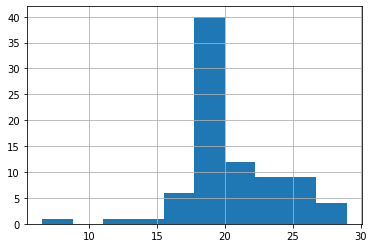

In [82]:
data['yj'].hist()

# f1 데이터의 박스-칵스 변환
sklearn.preprocessing.PowerTransformer(method='yeo-johnson', *, standardize=True, copy=True)

In [83]:
data['bc'] = power_transform(data[['f1']], standardize=False, method='box-cox')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


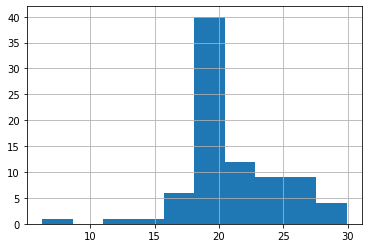

In [84]:
data['bc'].hist()

In [85]:
data

,id,age,city,f1,f2,f3,f4,f5,yj,bc
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986,20.583423,21.067090
3,id04,75.0,서울,50.0,2,NaN,INFP,52.667078,17.968081,18.305263
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869,25.773745,26.557680
5,id06,22.0,서울,57.0,0,vip,INTP,20.129444,19.653167,20.084373
6,id07,36.3,서울,60.0,1,NaN,ISFJ,9.796378,20.352915,20.823545
...,...,...,...,...,...,...,...,...,...,...
94,id95,77.0,경기,43.0,1,NaN,INTJ,91.297791,16.198225,16.437954
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078,18.699749,19.077601
96,id97,100.0,경기,50.0,0,NaN,INFP,67.886373,17.968081,18.305263
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899,19.887818,20.332219


여-존슨 변환과 박스-칵스 변환이 제대로 이루어졌음을 확인

-----------

# 여-존슨 값과 박스-칵스 값의 차이를 모두 더하고 소수점 둘째자리로 반올림

In [86]:
print(abs(data['yj'] - data['bc']).sum().round(2))

39.17
